In [5]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import cftime
import xclim as xc
import numpy as np
import nc_time_axis

from matplotlib import cm

In [2]:
# Load the dataset
ds = xr.open_dataset("tasmin_UKESM1_London.nc") #path of the file
print(ds)

<xarray.Dataset> Size: 3MB
Dimensions:    (time: 90360, bnds: 2, lat: 1, lon: 1)
Coordinates:
  * time       (time) object 723kB 1850-01-01 12:00:00 ... 2100-12-30 12:00:00
  * lat        (lat) float64 8B 51.88
  * lon        (lon) float64 8B 0.9375
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1MB ...
    lat_bnds   (lat, bnds) float64 16B ...
    lon_bnds   (lon, bnds) float64 16B ...
    tasmin     (time, lat, lon) float32 361kB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  144000.0
    creation_date:          2019-06-24T15:19:28Z
    ...                     ...
    variable_id:            tasmin
    variant_label:          r1i1p1f2
    license:                CMIP6 model data produced by the Met Office Hadle...
    cmor_version:           3.4.0
    tracking_id: 

In [3]:
# Extract the daily minimum temperature (tasmin)
tasmin = ds['tasmin']

# Convert to Celsius 
tasmin_celsius = tasmin - 273.15

print(tasmin_celsius)

<xarray.DataArray 'tasmin' (time: 90360, lat: 1, lon: 1)> Size: 361kB
array([[[2.928131 ]],

       [[2.2018127]],

       [[2.8746643]],

       ...,

       [[9.498199 ]],

       [[9.494293 ]],

       [[9.707672 ]]], dtype=float32)
Coordinates:
  * time     (time) object 723kB 1850-01-01 12:00:00 ... 2100-12-30 12:00:00
  * lat      (lat) float64 8B 51.88
  * lon      (lon) float64 8B 0.9375
    height   float64 8B ...


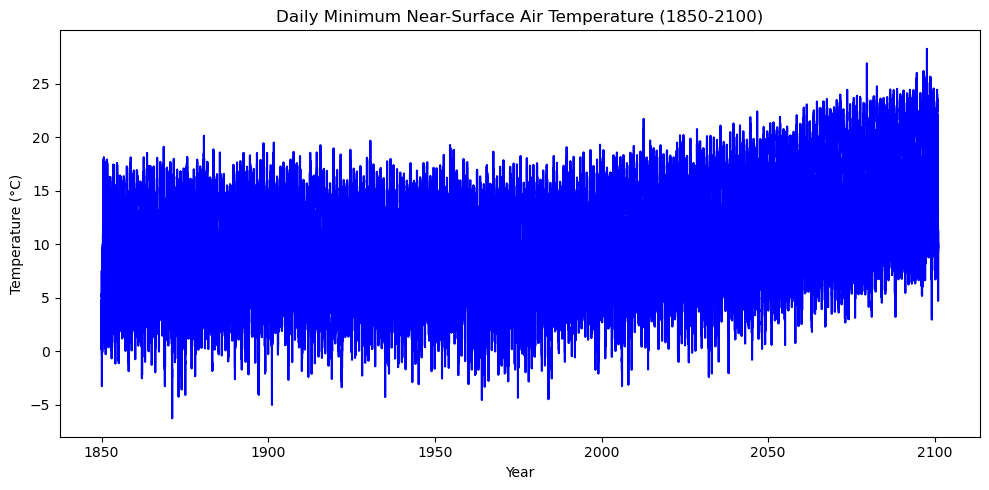

In [6]:
### Overall plot for Daily Minimum Near-Surface Air Temperature from 1850 to 2100 (360-Day Calendar)

# Extract the time values
time = ds['time'].values

# Extract the daily minimum temperature (tasmin) in Celsius
tasmin_celsius = ds['tasmin'] - 273.15  
tasmin_values = tasmin_celsius.values[:, 0, 0]  # Flatten lat and lon dimensions 

# Plot daily minimum temperature over time using cftime-compatible axis
plt.figure(figsize=(10, 5))
plt.plot(time, tasmin_values, label='Daily Minimum Temperature (°C)', color='b')

# Set x-axis labels 
# Convert the cftime.Datetime360Day objects  
ticks = [cftime.Datetime360Day(1850, 1, 1), cftime.Datetime360Day(1900, 1, 1), 
         cftime.Datetime360Day(1950, 1, 1), cftime.Datetime360Day(2000, 1, 1), 
         cftime.Datetime360Day(2050, 1, 1), cftime.Datetime360Day(2100, 1, 1)]
tick_labels = ['1850', '1900', '1950', '2000', '2050', '2100']

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Daily Minimum Near-Surface Air Temperature (1850-2100)')

plt.xticks(ticks=ticks, labels=tick_labels)


# Display the plot
plt.tight_layout()
plt.show()


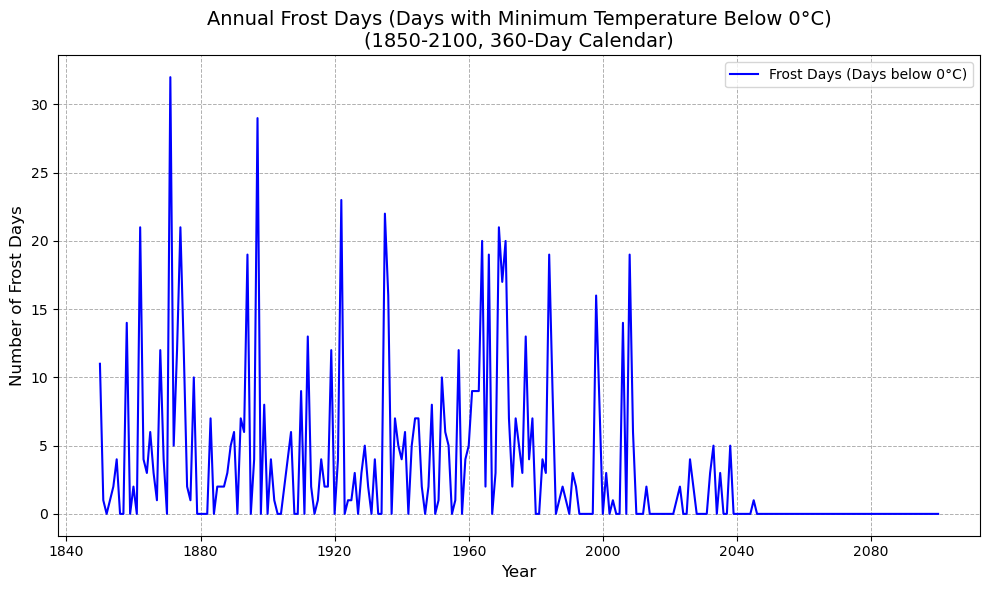

In [7]:
### frost_days

# Check units
tasmin_celsius.attrs['units'] = 'degC'

# threshold for frost days (0°C)
threshold_fro = '0 degC'

# Calculate the number of frost days
frost_days = xc.indices.frost_days(tasmin=tasmin_celsius, thresh=threshold_fro, freq='YS')

# Convert the time to pandas datetime 
time_str = [str(t) for t in frost_days.time.values]
time_converted = pd.to_datetime(time_str)

# Reassign the converted time back to the frost_days DataArray
frost_days['time'] = time_converted

# Plot the frost days over time
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability

# Plotting the frost days over time
frost_days.plot(label='Frost Days (Days below 0°C)', color='b')

# Add title
plt.title('Annual Frost Days (Days with Minimum Temperature Below 0°C)\n(1850-2100, 360-Day Calendar)', fontsize=14)

# Add axis labels
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Frost Days', fontsize=12)

# Add gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Add legend
plt.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

# Show the frost days data
#print(frost_days)

In [8]:
### 10 percentile thresholds (whold period)
# Group by day of year to calculate percentiles for each day over the historical period
tasmin_per = tasmin_celsius.groupby('time.dayofyear').quantile(0.1)

# Set the units for tasmin_per to match tasmin_celsius
tasmin_per.attrs['units'] = 'degC'
tasmin_per

<xarray.DataArray 'tasmin' (dayofyear: 360, lat: 1, lon: 1)> Size: 3kB
array([[[ 1.38198853]],

       [[ 1.57632446]],

       [[ 1.54092407]],

       [[ 1.98257446]],

       [[ 2.11001587]],

       [[ 1.81289673]],

       [[ 1.94961548]],

       [[ 1.8241272 ]],

       [[ 2.01919556]],

       [[ 2.0350647 ]],

...

       [[ 2.81338501]],

       [[ 3.09487915]],

       [[ 2.89370728]],

       [[ 2.68716431]],

       [[ 2.42129517]],

       [[ 2.33682251]],

       [[ 2.10440063]],

       [[ 2.0218811 ]],

       [[ 1.5506897 ]],

       [[ 1.49502563]]])
Coordinates:
  * lat        (lat) float64 8B 51.88
  * lon        (lon) float64 8B 0.9375
    quantile   float64 8B 0.1
  * dayofyear  (dayofyear) int64 3kB 1 2 3 4 5 6 7 ... 355 356 357 358 359 360
Attributes:
    units:    degC

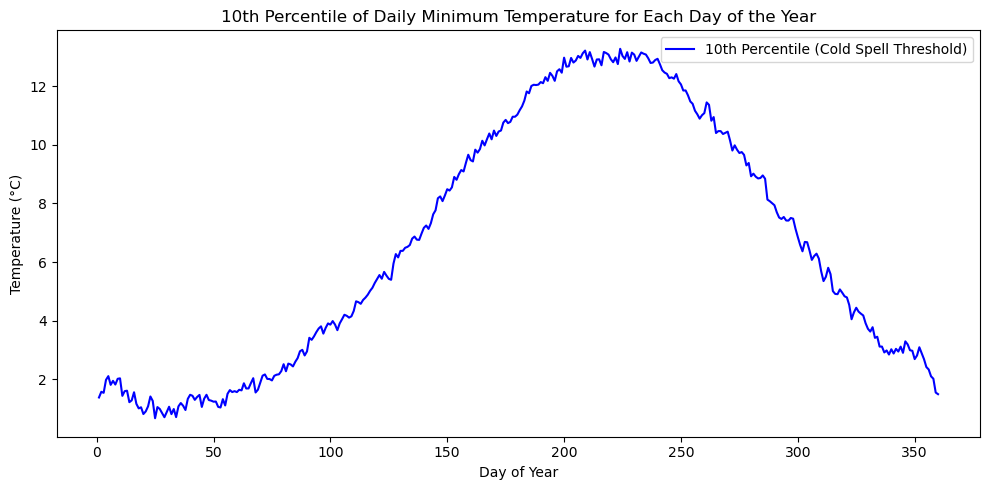

In [9]:
### Threshold plot (days)
# Extract the day of the year and the percentile values
day_of_year = tasmin_per['dayofyear'].values
percentile_values = tasmin_per.values.squeeze()  # Flatten the values

# Plot the 10th percentile threshold for each day of the year
plt.figure(figsize=(10, 5))
plt.plot(day_of_year, percentile_values, label='10th Percentile (Cold Spell Threshold)', color='b')

# Add labels and title
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.title('10th Percentile of Daily Minimum Temperature for Each Day of the Year')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

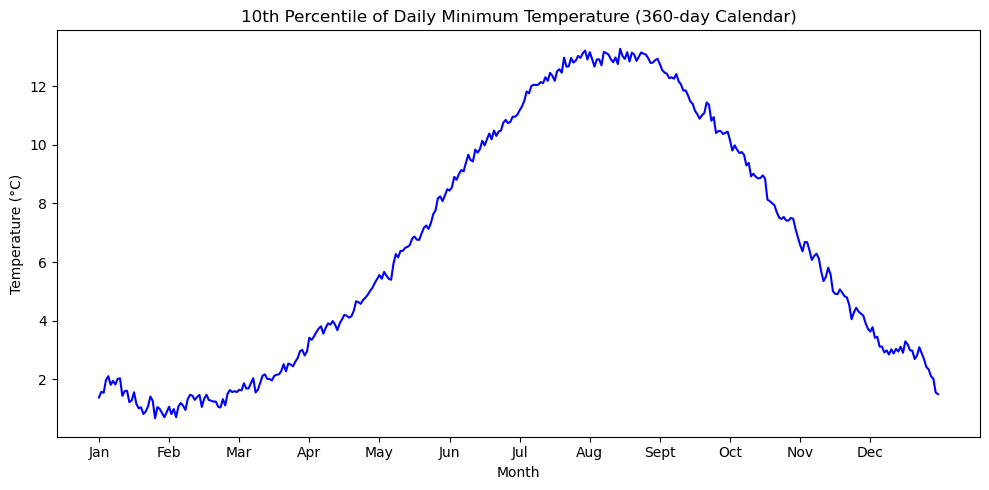

In [10]:
### Threshold plot (X-AXIS=year)

# Extract the day of the year and the percentile values
day_of_year = tasmin_per['dayofyear'].values
percentile_values = tasmin_per.values.squeeze()  # Flatten the values

# Create a list of month names for the x-axis 
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

# Define positions for the month labels on a 360-day calendar (each month has 30 days)
month_positions = np.arange(1, 360, 30)

# Plot the 10th percentile threshold for each day of the year
plt.figure(figsize=(10, 5))
plt.plot(day_of_year, percentile_values, label='10th Percentile (Cold Spell Threshold)', color='b')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('10th Percentile of Daily Minimum Temperature (360-day Calendar)')

plt.xticks(month_positions, month_names)

# Display the plot
plt.tight_layout()
plt.show()

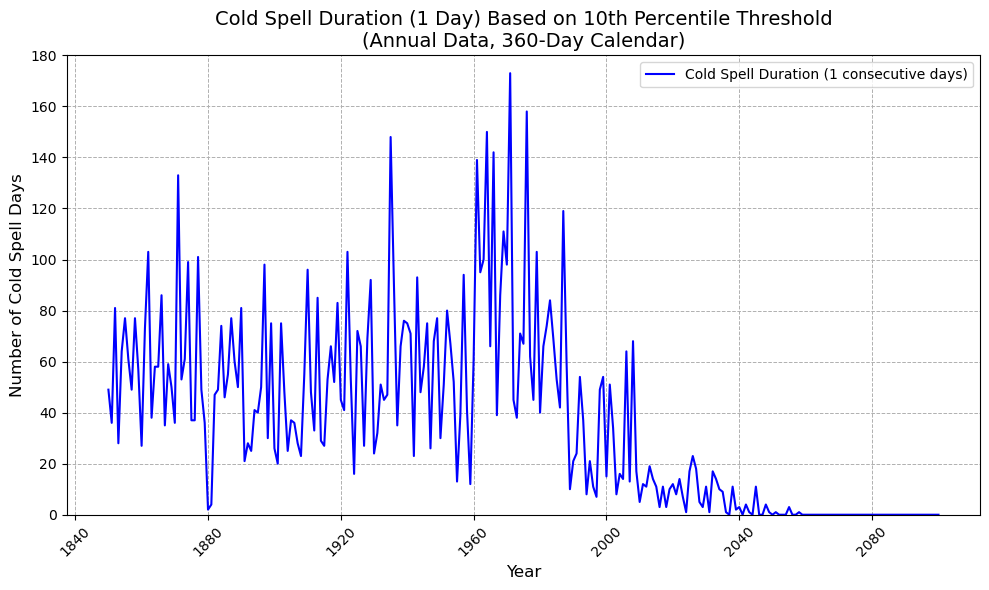

In [12]:
### cold spell duration where windos=1 (1 day）

# Compute cold spell duration index using the 10th percentile as the threshold
cold_spell_duration_1_days = xc.indices.cold_spell_duration_index(
    tasmin=ds['tasmin'], 
    tasmin_per=tasmin_per,  # 10th percentile DataArray
    window=1, 
    freq='YS', 
    op='<'
)

# Convert cftime to string and then to pandas datetime
time_str = [str(t) for t in cold_spell_duration_1_days.time.values]
time_converted = pd.to_datetime(time_str)

# Reassign converted time to cold_spell_duration DataArray
cold_spell_duration_1_days['time'] = time_converted

# Create the plot
plt.figure(figsize=(10, 6))  

# Plot the cold spell duration over time
cold_spell_duration_1_days.plot(label='Cold Spell Duration (1 consecutive days)', color='b')

# Add a title
plt.title('Cold Spell Duration (1 Day) Based on 10th Percentile Threshold\n(Annual Data, 360-Day Calendar)', fontsize=14)

# Add axis labels
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Cold Spell Days', fontsize=12)

# Set y-axis limit and interval
plt.ylim(0, 180)  
plt.yticks(range(0, 181, 20))  

# Add gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add a legend
plt.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


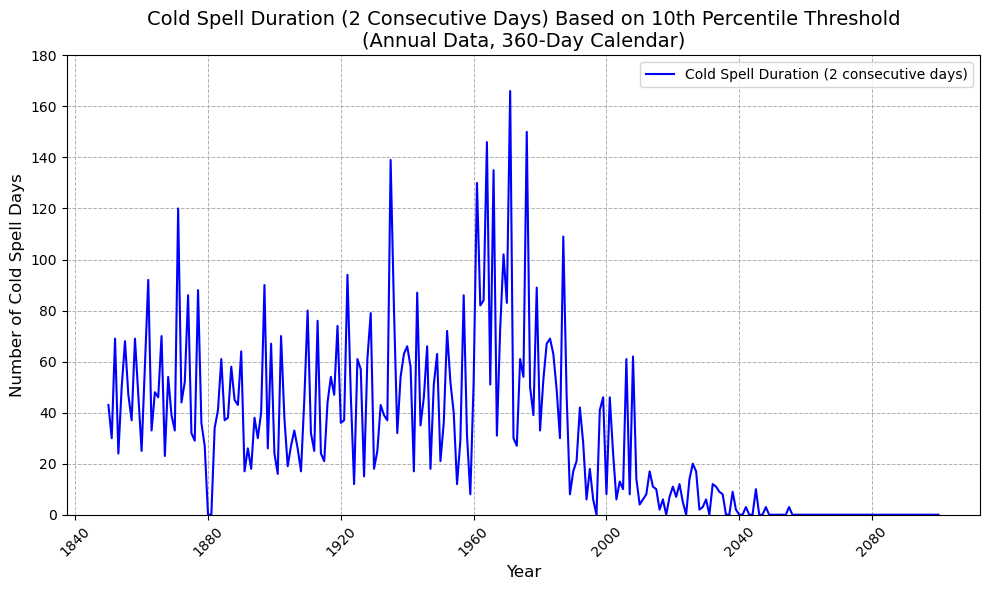

In [13]:
### cold spell duration where windos=2 (2 consecutive days）

# Compute cold spell duration index using the 10th percentile as the threshold
cold_spell_duration_2_days = xc.indices.cold_spell_duration_index(
    tasmin=ds['tasmin'], 
    tasmin_per=tasmin_per,  # 10th percentile DataArray
    window=2, 
    freq='YS', 
    op='<'
)

# Convert cftime to string and then to pandas datetime
time_str = [str(t) for t in cold_spell_duration_2_days.time.values]
time_converted = pd.to_datetime(time_str)

# Reassign converted time to cold_spell_duration DataArray
cold_spell_duration_2_days['time'] = time_converted

# Create the plot
plt.figure(figsize=(10, 6))  

# Plot the cold spell duration over time
cold_spell_duration_2_days.plot(label='Cold Spell Duration (2 consecutive days)', color='b')

# Add a title
plt.title('Cold Spell Duration (2 Consecutive Days) Based on 10th Percentile Threshold\n(Annual Data, 360-Day Calendar)', fontsize=14)

# Add axis labels
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Cold Spell Days', fontsize=12)

# Set y-axis limit and interval
plt.ylim(0, 180)  # Limit y-axis from 0 to 180
plt.yticks(range(0, 181, 20))  

# Add gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add a legend
plt.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


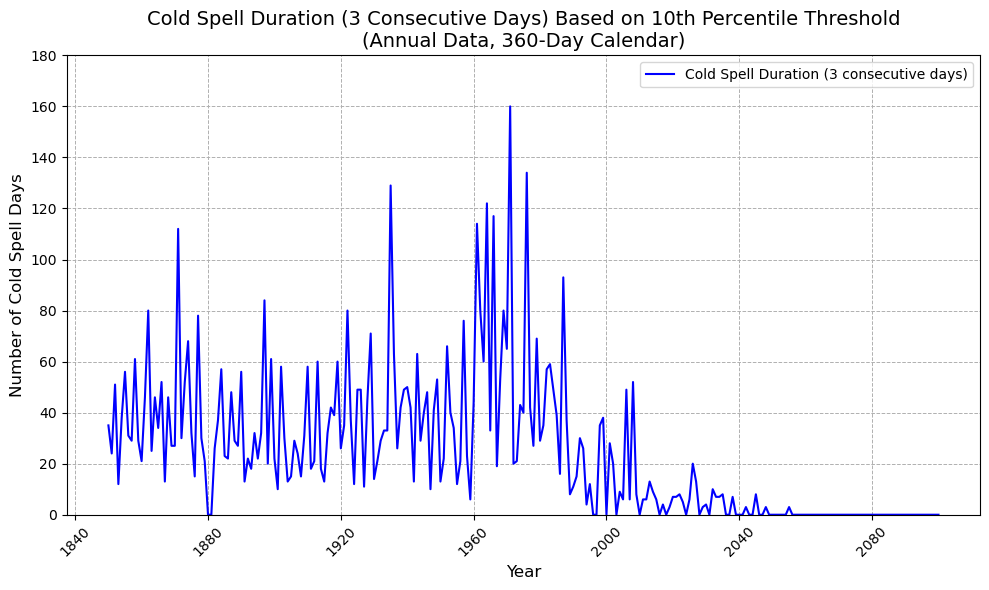

In [14]:
### cold spell duration where windos=3 (3 consecutive days）

# Compute cold spell duration index using the 10th percentile as the threshold
cold_spell_duration_3_days = xc.indices.cold_spell_duration_index(
    tasmin=ds['tasmin'], 
    tasmin_per=tasmin_per,  # 10th percentile DataArray
    window=3, 
    freq='YS', 
    op='<'
)

# Convert cftime to string and then to pandas datetime
time_str = [str(t) for t in cold_spell_duration_3_days.time.values]
time_converted = pd.to_datetime(time_str)

# Reassign converted time to cold_spell_duration DataArray
cold_spell_duration_3_days['time'] = time_converted

# Create the plot
plt.figure(figsize=(10, 6))  

# Plot the cold spell duration over time
cold_spell_duration_3_days.plot(label='Cold Spell Duration (3 consecutive days)', color='b')

# Add title
plt.title('Cold Spell Duration (3 Consecutive Days) Based on 10th Percentile Threshold\n(Annual Data, 360-Day Calendar)', fontsize=14)

# Add axis labels
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Cold Spell Days', fontsize=12)

# Set y-axis limit and interval
plt.ylim(0, 180)  # Limit y-axis from 0 to 180
plt.yticks(range(0, 181, 20))  # Set y-axis ticks at intervals of 20

# Add gridlines 
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Rotate x-axis labels 
plt.xticks(rotation=45)

# Add a legend
plt.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


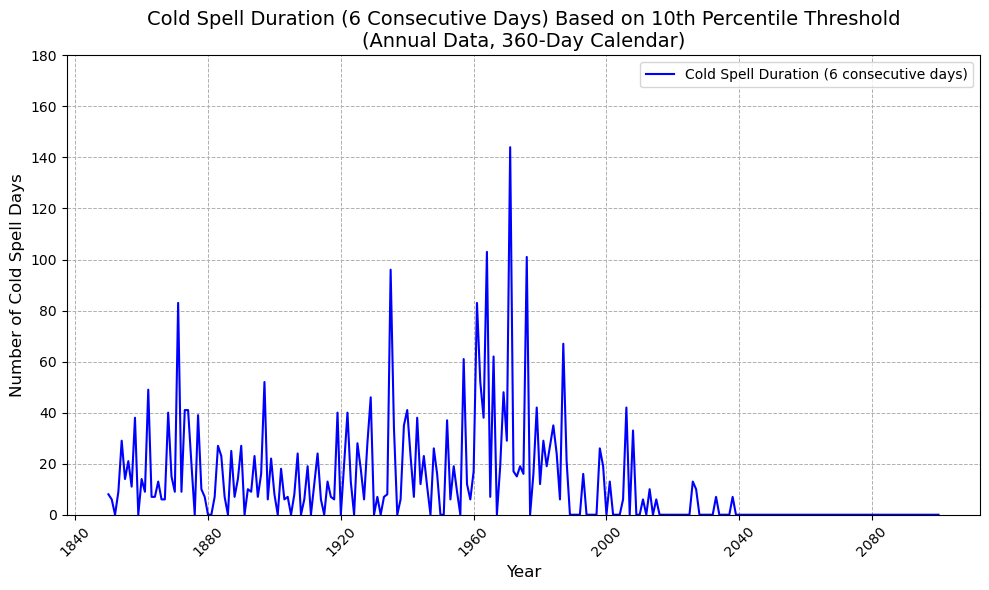

In [15]:
### cold spell duration where windos=6 (6 consecutive days）

# Compute cold spell duration index using the 10th percentile as the threshold
cold_spell_duration_6_days = xc.indices.cold_spell_duration_index(
    tasmin=ds['tasmin'], 
    tasmin_per=tasmin_per,  # 10th percentile DataArray
    window=6, 
    freq='YS', 
    op='<'
)

# Convert cftime to string and then to pandas datetime
time_str = [str(t) for t in cold_spell_duration_6_days.time.values]
time_converted = pd.to_datetime(time_str)

# Reassign converted time to cold_spell_duration DataArray
cold_spell_duration_6_days['time'] = time_converted

# Create the plot
plt.figure(figsize=(10, 6))  

# Plot the cold spell duration over time
cold_spell_duration_6_days.plot(label='Cold Spell Duration (6 consecutive days)', color='b')

# Add title
plt.title('Cold Spell Duration (6 Consecutive Days) Based on 10th Percentile Threshold\n(Annual Data, 360-Day Calendar)', fontsize=14)

# Add axis labels
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Cold Spell Days', fontsize=12)

# Set y-axis limit and interval
plt.ylim(0, 180)  # Limit y-axis from 0 to 180
plt.yticks(range(0, 181, 20))  # Set y-axis ticks at intervals of 20

# Add gridlines 
plt.grid(True, which='both', linestyle='--', linewidth=0.7)

# Rotate x-axis labels 
plt.xticks(rotation=45)

# Add a legend
plt.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


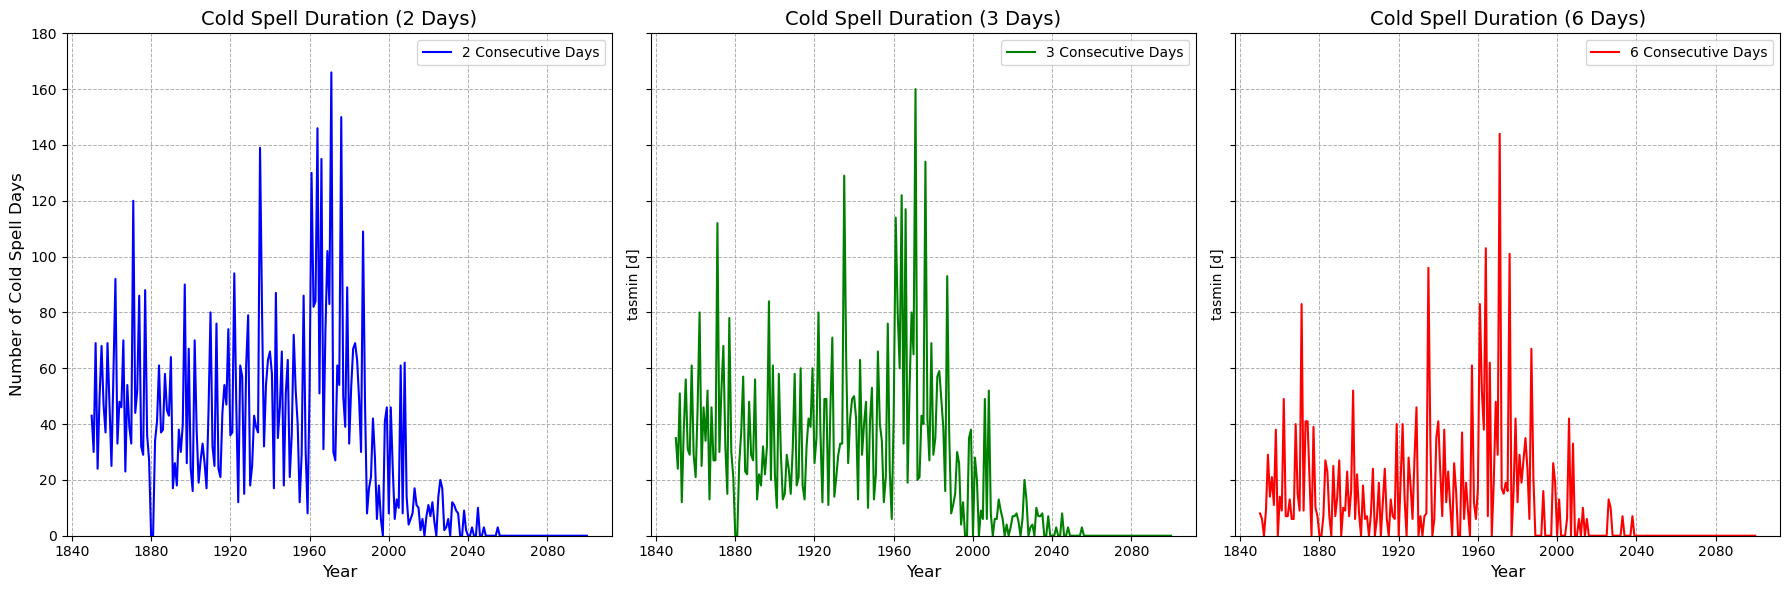

In [16]:
# Function to convert cftime to pandas datetime (reuse for each plot)
def convert_time_to_datetime(data_array):
    time_str = [str(t) for t in data_array.time.values]
    return pd.to_datetime(time_str)

# Compute cold spell duration for 2, 3, and 6 consecutive days
#cold_spell_duration_2_days = xc.indices.cold_spell_duration_index(
#    tasmin=ds['tasmin'], 
#    tasmin_per=tasmin_per,  # 10th percentile DataArray
#    window=2, 
#    freq='YS', 
#    op='<'
#)
#cold_spell_duration_3_days = xc.indices.cold_spell_duration_index(
#    tasmin=ds['tasmin'], 
#    tasmin_per=tasmin_per, 
#    window=3, 
#    freq='YS', 
#    op='<'
#)
#cold_spell_duration_6_days = xc.indices.cold_spell_duration_index(
#    tasmin=ds['tasmin'], 
#    tasmin_per=tasmin_per, 
#    window=6, 
#    freq='YS', 
#    op='<'
#)


cold_spell_duration_2_days['time'] = convert_time_to_datetime(cold_spell_duration_2_days)
cold_spell_duration_3_days['time'] = convert_time_to_datetime(cold_spell_duration_3_days)
cold_spell_duration_6_days['time'] = convert_time_to_datetime(cold_spell_duration_6_days)

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for 2 consecutive days
cold_spell_duration_2_days.plot(ax=axes[0], label='2 Consecutive Days', color='b')
axes[0].set_title('Cold Spell Duration (2 Days)', fontsize=14)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Number of Cold Spell Days', fontsize=12)
axes[0].set_ylim(0, 180)
axes[0].set_yticks(range(0, 181, 20))
axes[0].grid(True, linestyle='--', linewidth=0.7)
axes[0].legend(loc='upper right')

# Plot for 3 consecutive days
cold_spell_duration_3_days.plot(ax=axes[1], label='3 Consecutive Days', color='g')
axes[1].set_title('Cold Spell Duration (3 Days)', fontsize=14)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylim(0, 180)
axes[1].set_yticks(range(0, 181, 20))
axes[1].grid(True, linestyle='--', linewidth=0.7)
axes[1].legend(loc='upper right')

# Plot for 6 consecutive days
cold_spell_duration_6_days.plot(ax=axes[2], label='6 Consecutive Days', color='r')
axes[2].set_title('Cold Spell Duration (6 Days)', fontsize=14)
axes[2].set_xlabel('Year', fontsize=12)
axes[2].set_ylim(0, 180)
axes[2].set_yticks(range(0, 181, 20))
axes[2].grid(True, linestyle='--', linewidth=0.7)
axes[2].legend(loc='upper right')

# show the plots
plt.tight_layout()
plt.show()

/tmp/ipykernel_69609/3318922031.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm', (end_year - start_year) // k_years + 1)


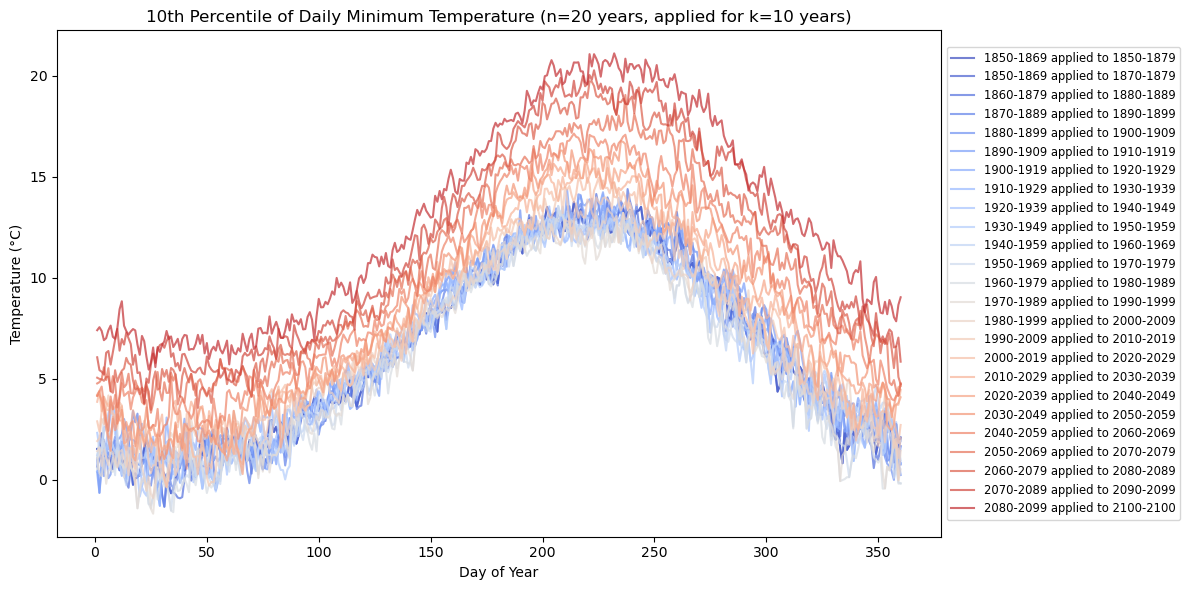

     day_of_year  1850-1879  1870-1879  1880-1889  1890-1899  1900-1909  \
0              1   1.537238   1.537238   0.660187   1.062506   0.967389   
1              2   1.548688   1.548688   1.043048   1.048395  -0.636517   
2              3   2.309064   2.309064   1.321393   1.078326   0.574664   
3              4   1.853937   1.853937   1.512457   0.921515   0.188776   
4              5   1.141974   1.141974   1.022662   1.395758   1.536725   
..           ...        ...        ...        ...        ...        ...   
355          356   1.491193   1.491193   1.455450   1.956866   0.436139   
356          357   0.870221   0.870221   1.672662   1.720514   0.002008   
357          358   2.765363   2.765363   1.215411   1.310406   1.394757   
358          359   1.529962   1.529962   1.680695   1.502374   0.917242   
359          360   2.095343   2.095343   1.675055   0.766583   0.246271   

     1910-1919  1920-1929  1930-1939  1940-1949  ...  2010-2019  2020-2029  \
0     0.349078   0.41

In [18]:
##### Setting time periods for thresholds calculation
### Number of years used to calculate the 10th percentile (n) and 
### Number of years to apply the threshold (k)
# reference period and its applied period are changed from below

# Define the parameters
n_years = 20  # Number of years used to calculate the 10th percentile
k_years = 10   # Number of years to apply the threshold

start_year = int(str(tasmin_celsius.time.dt.year[0].values))  # First year in the dataset
end_year = int(str(tasmin_celsius.time.dt.year[-1].values))  # Last year in the dataset

# Check the calendar type of the dataset
calendar_type = tasmin_celsius.time.dt.calendar  

# Define the last day of the year depending on the calendar type
last_day_of_year = "12-30" if calendar_type == "360_day" else "12-31"

# Create a colormap from blue to red
cmap = cm.get_cmap('coolwarm', (end_year - start_year) // k_years + 1)
colors = cmap(np.linspace(0, 1, (end_year - start_year) // k_years + 1))

plt.figure(figsize=(12, 6))

# Initialise a dictionary to store the data
percentile_data = {}

# First period: Calculate the threshold for the first interval (e.g., 1850-1999) and apply for the same period
calc_start = start_year
calc_end = calc_start + n_years - 1  # (first calculation period)

apply_start = calc_start
apply_end = calc_end + k_years  # Apply for 1850-1850 + (k + n) years

# Calculate the 10th percentile for the first step
first_tasmin_calc_period = tasmin_celsius.sel(time=slice(f'{calc_start}-01-01', f'{calc_end}-{last_day_of_year}'))
first_tasmin_per = first_tasmin_calc_period.groupby('time.dayofyear').quantile(0.1)

# Extract day of year and percentile values for the first step
first_day_of_year = first_tasmin_per['dayofyear'].values
first_percentile_values = first_tasmin_per.values.squeeze()

# Store the data under the "applied to" period
percentile_data[f'{apply_start}-{apply_end}'] = first_percentile_values

# Plot the 10th percentile for the first step
plt.plot(first_day_of_year, first_percentile_values, 
         label=f'{calc_start}-{calc_end} applied to {apply_start}-{apply_end}', 
         alpha=0.7, color=colors[0])

# Update for the next period 
step = 1
calc_start = calc_end + 1  
apply_start = calc_start
apply_end = apply_start + k_years - 1  

while apply_start <= end_year:
    # Calculate thresholds based on the previous n_years
    prev_calc_start = calc_start - n_years  # Previous n_years 
    prev_calc_end = calc_start - 1  # End year of the previous period

    # Select the period for calculation
    tasmin_calc_period = tasmin_celsius.sel(time=slice(f'{prev_calc_start}-01-01', f'{prev_calc_end}-{last_day_of_year}'))
    tasmin_per = tasmin_calc_period.groupby('time.dayofyear').quantile(0.1)
    
    # Extract day of year and percentile values
    day_of_year = tasmin_per['dayofyear'].values
    percentile_values = tasmin_per.values.squeeze()
    
    # Store the data under the "applied to" period
    percentile_data[f'{apply_start}-{apply_end}'] = percentile_values
    
    # Plot the 10th percentile for this step
    plt.plot(day_of_year, percentile_values, 
             label=f'{prev_calc_start}-{prev_calc_end} applied to {apply_start}-{apply_end}', 
             alpha=0.7, color=colors[step])
    
    # Update for the next interval
    calc_start = apply_end + 1  # Move to the next start year 
    apply_start = calc_start  # Start applying for the new period
    apply_end = min(apply_start + k_years - 1, end_year)  # Ensure we don't exceed 2099
    
    step += 1

# Add labels and title
plt.xlabel('Day of Year')
plt.ylabel('Temperature (°C)')
plt.title(f'10th Percentile of Daily Minimum Temperature (n={n_years} years, applied for k={k_years} years)')

# Move the legend outside the plot and limit the number of columns
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small', ncol=1)

# Display the plot
plt.tight_layout()
plt.show()

# Save the collected data into a DataFrame
percentile_df = pd.DataFrame(percentile_data)
percentile_df.insert(0, 'day_of_year', first_day_of_year)


# Display the DataFrame
print(percentile_df)



# Save the DataFrame to a CSV file
#percentile_df.to_csv('tasmin_percentiles_correct_intervals.csv', index=False)


In [19]:
percentile_df

,day_of_year,1850-1879,1870-1879,1880-1889,1890-1899,1900-1909,1910-1919,1920-1929,1930-1939,1940-1949,...,2010-2019,2020-2029,2030-2039,2040-2049,2050-2059,2060-2069,2070-2079,2080-2089,2090-2099,2100-2100
0,1,1.537238,1.537238,0.660187,1.062506,0.967389,0.349078,0.413190,0.434943,2.331305,...,1.923322,2.902203,3.868976,4.222369,4.164264,4.164264,4.776520,5.061066,6.071588,7.411334
1,2,1.548688,1.548688,1.043048,1.048395,-0.636517,-0.636517,0.259332,0.438580,1.589215,...,2.073834,2.396490,4.362457,4.403937,4.202887,4.389752,4.840143,5.001715,5.437872,7.560651
2,3,2.309064,2.309064,1.321393,1.078326,0.574664,1.132111,0.354449,0.354449,1.520050,...,3.027277,3.402008,3.401862,3.908771,3.908771,4.622321,4.996613,4.984528,5.357379,7.373785
3,4,1.853937,1.853937,1.512457,0.921515,0.188776,0.401251,0.452106,1.730695,2.601178,...,2.760480,4.116412,4.116412,3.629962,3.305817,3.764166,5.580988,4.906622,5.212482,6.918195
4,5,1.141974,1.141974,1.022662,1.395758,1.536725,1.781012,1.768341,1.855133,2.659503,...,3.490533,3.490533,3.839801,3.163361,2.550665,2.880182,4.946295,5.095270,6.295099,7.018097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,356,1.491193,1.491193,1.455450,1.956866,0.436139,0.613947,3.015289,2.796442,2.710065,...,2.633429,3.356598,3.404694,2.483014,3.105035,4.005084,4.693829,6.473419,7.325665,8.599225
356,357,0.870221,0.870221,1.672662,1.720514,0.002008,1.375690,2.528864,2.357770,2.242340,...,1.585822,2.933453,3.649298,2.734528,3.673541,3.938971,4.943219,5.536188,6.557477,8.060968
357,358,2.765363,2.765363,1.215411,1.310406,1.394757,1.182452,2.227399,2.227399,2.864801,...,2.038898,2.422784,3.723541,3.736749,4.134357,4.159625,4.424396,6.607574,6.607574,7.852325
358,359,1.529962,1.529962,1.680695,1.502374,0.917242,0.952032,0.875275,0.875275,1.810480,...,1.086676,1.834406,3.721515,3.811163,4.596564,4.171417,4.171417,5.099493,7.046930,8.669464


In [20]:
# Remove the second column 
percentile_df_clean = percentile_df.drop(percentile_df.columns[2], axis=1)

print(percentile_df_clean)

     day_of_year  1850-1879  1880-1889  1890-1899  1900-1909  1910-1919  \
0              1   1.537238   0.660187   1.062506   0.967389   0.349078   
1              2   1.548688   1.043048   1.048395  -0.636517  -0.636517   
2              3   2.309064   1.321393   1.078326   0.574664   1.132111   
3              4   1.853937   1.512457   0.921515   0.188776   0.401251   
4              5   1.141974   1.022662   1.395758   1.536725   1.781012   
..           ...        ...        ...        ...        ...        ...   
355          356   1.491193   1.455450   1.956866   0.436139   0.613947   
356          357   0.870221   1.672662   1.720514   0.002008   1.375690   
357          358   2.765363   1.215411   1.310406   1.394757   1.182452   
358          359   1.529962   1.680695   1.502374   0.917242   0.952032   
359          360   2.095343   1.675055   0.766583   0.246271   1.605157   

     1920-1929  1930-1939  1940-1949  1950-1959  ...  2010-2019  2020-2029  \
0     0.413190   0.43

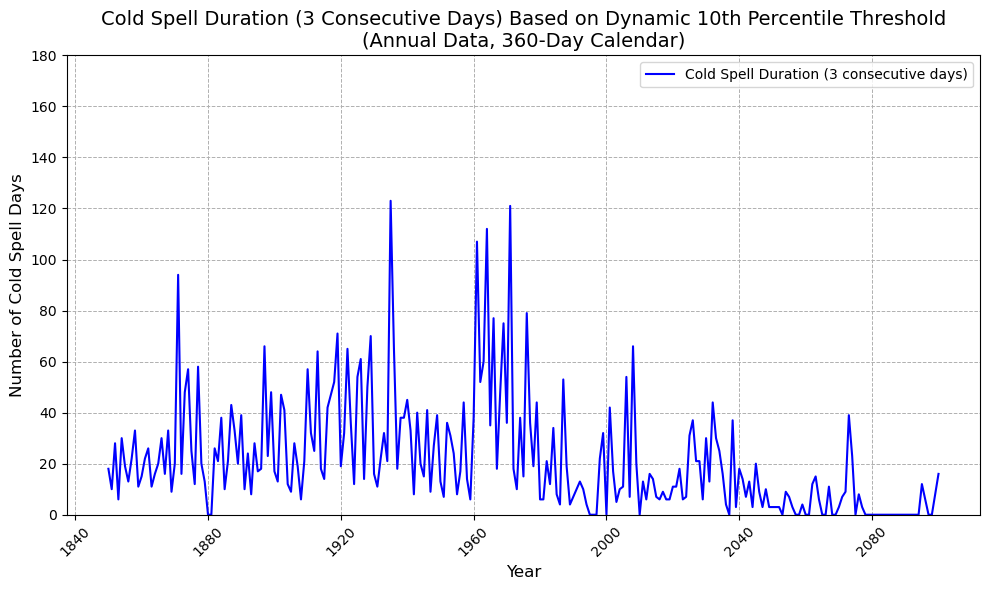

In [21]:
### Cold Spell Duration plot (dynamic thresholds)
# window = 3
# Create a function to apply the correct percentile threshold for each period
def get_dynamic_percentile(tasmin, percentile_df_clean, year):
    # Find the right period based on the year
    for period in percentile_df_clean.columns[1:]:  # Skip 'day_of_year' column
        start_year, end_year = map(int, period.split('-'))
        if start_year <= year <= end_year:
            # Select the matching percentile values for the given period
            tasmin_per_values = percentile_df_clean[['day_of_year', period]].set_index('day_of_year')[period].values
            
            # Create a 'dayofyear' coordinate based on the 360-day calendar
            day_of_year = np.arange(1, 361)  # Adjust to match calendar (360 days)

            # Create a DataArray with 'dayofyear' coordinate
            tasmin_per_dynamic = xr.DataArray(tasmin_per_values, dims=["dayofyear"], coords={"dayofyear": day_of_year})
            tasmin_per_dynamic.attrs['units'] = 'degC'  # Assign Celsius units
            
            return tasmin_per_dynamic

# Initialise an empty list to collect results
cold_spell_results = []

# Loop through each year in the dataset and apply the dynamic threshold
for year in np.unique(ds['tasmin'].time.dt.year):
    # Extract the tasmin data for the current year
    tasmin_year = ds['tasmin'].sel(time=str(year))
    
    # Get the dynamic percentile for this year
    tasmin_per_dynamic = get_dynamic_percentile(tasmin_year, percentile_df_clean, year)
    
    # Compute cold spell duration index for this year
    cold_spell_duration_year = xc.indices.cold_spell_duration_index(
        tasmin=tasmin_year,
        tasmin_per=tasmin_per_dynamic,  # Dynamic percentile for this year
        window=3, ##### window = 3
        freq='YS',
        op='<'
    )
    
    # Append results for this year
    cold_spell_results.append(cold_spell_duration_year)

# Concatenate the results along the time dimension
cold_spell_duration_all = xr.concat(cold_spell_results, dim="time")

# Convert cftime to string and then to pandas datetime
time_str = [str(t) for t in cold_spell_duration_all.time.values]
time_converted = pd.to_datetime(time_str)

# Reassign converted time to cold_spell_duration DataArray
cold_spell_duration_all['time'] = time_converted

# Plot the cold spell duration over time
plt.figure(figsize=(10, 6))

cold_spell_duration_all.plot(label='Cold Spell Duration (3 consecutive days)', color='b')

# Add title and labels
plt.title('Cold Spell Duration (3 Consecutive Days) Based on Dynamic 10th Percentile Threshold\n(Annual Data, 360-Day Calendar)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Cold Spell Days', fontsize=12)

# Set y-axis limits and intervals
plt.ylim(0, 180)  # Limit y-axis from 0 to 180
plt.yticks(range(0, 181, 20))  # Set y-axis ticks at intervals of 20

# Add gridlines and rotate x-axis labels
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.xticks(rotation=45)

# Add legend
plt.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()
